# 경제데이터

출처: [한국은행] https://ecos.bok.or.kr/#/SearchStat

- 한국은행 기준금리 및 여수신금리: Bank of Korea Base Rate and Loans and Deposits Rates
(rate)


- 예금취급기관 가계대출(용도별, 월) - 주택담도대출(예금은행):mortgage_loan  
mortgage_loan  
단위: 십억원  
<br><br>
- 예금취급기관 가계대출(용도별, 월): Household loans from deposit handling institutions (by use, monthly)  
credit_loan  
단위: 십억원  
<br><br>
- 예금취급기관 가계대출(업권별, 월):Household loans from deposit handling institutions (by industry, monthly)  
industry_loan  
단위: 십억원  
<br><br>
- 가계대출 연체율: Bank loan delinquency rate
load_delinquency_rate  
단위: %
<br><br>
- 신용카드대출 연체율: Bank loan delinquency rate
credit_card_overdue
단위: %
<br><br>
- 경제심리지수: Economic Sentiment Index, ESI
100을 기준으로 나눔

In [1]:
# import module
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import platform
import seaborn as sns

In [2]:
def font():
    system_name = platform.system()
    if system_name == 'Windows':
        plt.rc('font', family='Malgun Gothic', size = 12) 
        plt.rc('axes', unicode_minus = False)
    elif system_name == 'Darwin': # Mac OS
        plt.rc('font', family='AppleGothic', size = 12)
    elif system_name == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf' 
        font_name = fm.FontProperties(fname=path, size=12)
        plt.rc('font', family=font_name) 
    else:
        print("Not support")

In [3]:
df = pd.read_csv('data/economy_multiple_statistics.csv', encoding = 'utf-8-sig')
df.head()

,변환,원자료,원자료.1,원자료.2,원자료.3,원자료.4,원자료.5,원자료.6
0,2018/01,1.5,"465,097.3","197,826.7","662,924.0",0.3,2.4,100.5
1,2018/02,1.5,"466,588.2","198,545.0","665,133.2",0.3,2.5,100.0
2,2018/03,1.5,"468,822.8","200,035.9","668,858.6",0.3,2.2,99.6
3,2018/04,1.5,"470,447.7","202,683.9","673,131.6",0.3,2.3,99.1
4,2018/05,1.5,"472,394.1","205,065.9","677,460.0",0.3,2.4,98.6


In [4]:
df.columns = ['year', 'rate', 'mortgage_loan', 'credit_loan', 'industry_loan', 'load_delinquency_rate', 'credit_card_overdue', 'ESI']
df = df.drop(columns = ['credit_loan', 'load_delinquency_rate', 'credit_card_overdue'])
df

,year,rate,mortgage_loan,industry_loan,ESI
0,2018/01,1.50,"465,097.3","662,924.0",100.5
1,2018/02,1.50,"466,588.2","665,133.2",100.0
2,2018/03,1.50,"468,822.8","668,858.6",99.6
3,2018/04,1.50,"470,447.7","673,131.6",99.1
4,2018/05,1.50,"472,394.1","677,460.0",98.6
...,...,...,...,...,...
56,2022/09,2.50,"637,605.7","902,946.1",97.2
57,2022/10,3.00,"639,286.1","902,667.0",95.7
58,2022/11,3.25,"640,797.0","902,097.8",94.2
59,2022/12,3.25,NaN,NaN,92.8


In [5]:
df.isnull().sum()

year             0
rate             1
mortgage_loan    2
industry_loan    2
ESI              0
dtype: int64

In [6]:
df = df.fillna(method='ffill')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61 non-null     object 
 1   rate           61 non-null     float64
 2   mortgage_loan  61 non-null     object 
 3   industry_loan  61 non-null     object 
 4   ESI            61 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.5+ KB


In [8]:
df.year = df.year.apply(lambda x: x.replace('/', '.'))
df.mortgage_loan = df.mortgage_loan.apply(lambda x: float(x.replace(',', '')))
df.industry_loan = df.industry_loan.apply(lambda x: float(x.replace(',', '')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61 non-null     object 
 1   rate           61 non-null     float64
 2   mortgage_loan  61 non-null     float64
 3   industry_loan  61 non-null     float64
 4   ESI            61 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [9]:
df.head()

,year,rate,mortgage_loan,industry_loan,ESI
0,2018.01,1.5,465097.3,662924.0,100.5
1,2018.02,1.5,466588.2,665133.2,100.0
2,2018.03,1.5,468822.8,668858.6,99.6
3,2018.04,1.5,470447.7,673131.6,99.1
4,2018.05,1.5,472394.1,677460.0,98.6


In [10]:
df.describe()

,rate,mortgage_loan,industry_loan,ESI
count,61.000000,61.000000,61.000000,61.000000
mean,1.340164,560043.859016,805503.113115,94.888525
std,0.728916,60440.563149,86984.974015,8.913849
min,0.500000,465097.300000,662924.000000,73.600000
25%,0.750000,504400.600000,722700.100000,92.300000
50%,1.500000,555095.000000,800828.500000,95.800000
75%,1.750000,625136.600000,902097.800000,100.500000
max,3.250000,640797.000000,910489.900000,106.600000


In [11]:
df.corr()

,rate,mortgage_loan,industry_loan,ESI
rate,1.000000,0.058195,-0.024555,0.186838
mortgage_loan,0.058195,1.000000,0.995580,0.253823
industry_loan,-0.024555,0.995580,1.000000,0.262637
ESI,0.186838,0.253823,0.262637,1.000000


In [12]:
log_df = df.copy(deep = True)
log_df.iloc[:, 2:5] = np.log(log_df.iloc[:, 2:5])
# log_df.iloc[:, 2:5] = (log_df.iloc[:, 2:5] - log_df.iloc[:, 2:5].mean())/log_df.iloc[:, 2:5].std()
log_df.head()

,year,rate,mortgage_loan,industry_loan,ESI
0,2018.01,1.5,13.050002,13.404416,4.610158
1,2018.02,1.5,13.053202,13.407743,4.605170
2,2018.03,1.5,13.057980,13.413328,4.601162
3,2018.04,1.5,13.061440,13.419696,4.596129
4,2018.05,1.5,13.065569,13.426106,4.591071


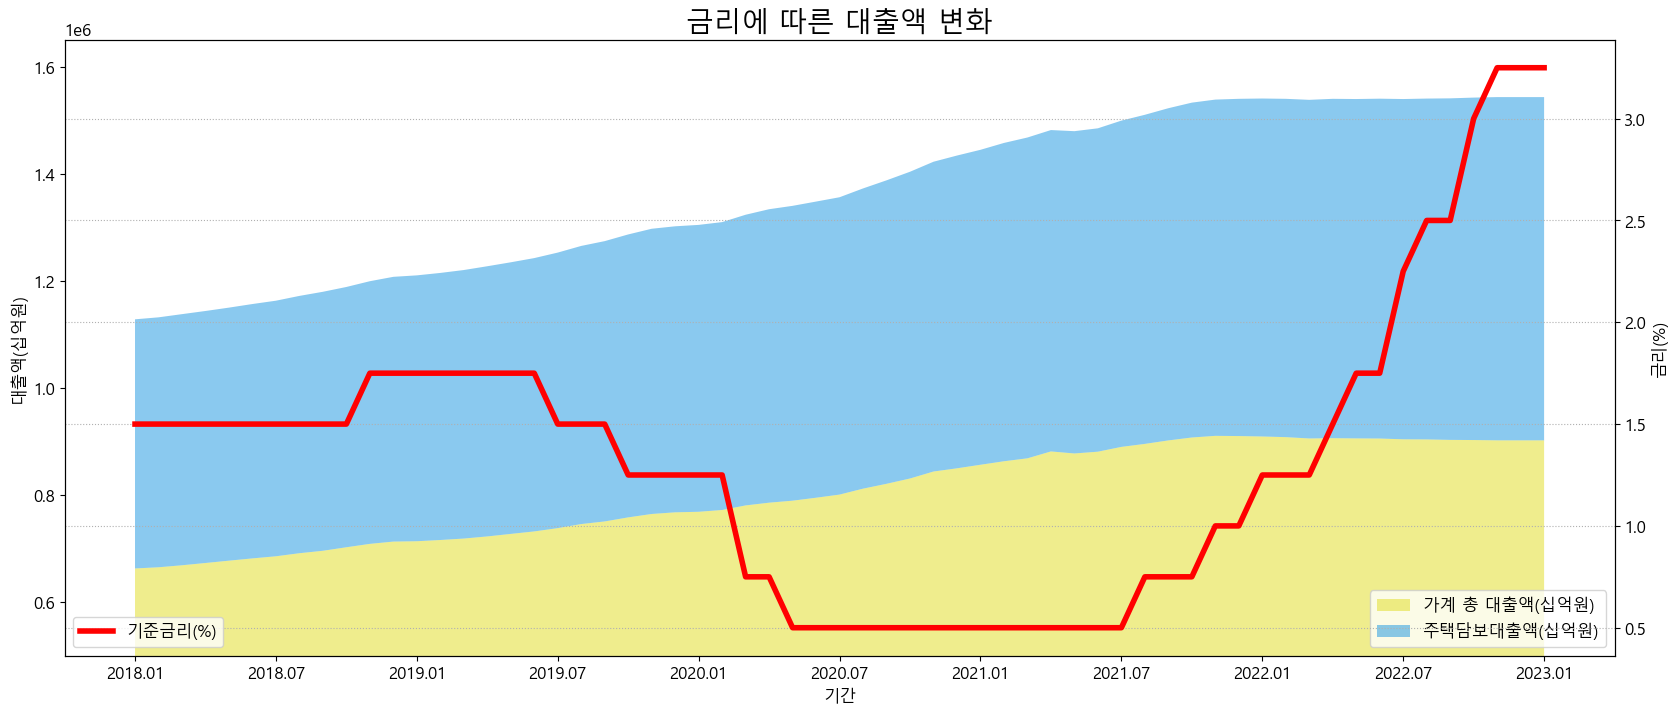

In [13]:
font()
fig, ax1 = plt.subplots(figsize = (20, 8))

color = ['#E0DC1D', '#1694E0']
label = ['가계 총 대출액(십억원)', '주택담보대출액(십억원)']

ax1.stackplot(df.year, df.industry_loan, df.mortgage_loan, colors = color, labels = label, alpha = 0.5) 

ax2 = ax1.twinx()
ax2.plot(df.year, df.rate, 'r-', label = '기준금리(%)', linewidth = 4)

ax1.legend(loc = 4)
ax2.legend(loc = 3)
plt.title('금리에 따른 대출액 변화', fontsize = 20)
ax1.set_xlabel('기간')
ax1.set_ylabel('대출액(십억원)')
ax2.set_ylabel('금리(%)')
ax1.set_ylim([500000, 1650000])
plt.xticks(range(0,61,6), log_df.year[::6], rotation = 90, fontsize = 5)

plt.savefig('saving/금리에 따른 대출액 변화.png')
plt.grid(linestyle=':')
plt.show()

In [14]:
log_df = df.copy(deep = True)
# log_df.iloc[:, 2:5] = np.log(log_df.iloc[:, 2:5])
log_df.iloc[:, 2:5] = (log_df.iloc[:, 2:5] - log_df.iloc[:, 2:5].mean())/log_df.iloc[:, 2:5].std()
log_df.head()

,year,rate,mortgage_loan,industry_loan,ESI
0,2018.01,1.5,-1.570908,-1.639123,0.629523
1,2018.02,1.5,-1.546241,-1.613726,0.573431
2,2018.03,1.5,-1.509269,-1.570898,0.528557
3,2018.04,1.5,-1.482385,-1.521774,0.472464
4,2018.05,1.5,-1.450181,-1.472014,0.416372


In [ ]:
font()
fig, ax1 = plt.subplots(figsize = (20, 8))
ax1.stackplot(log_df.year, log_df.rate, colors = color, labels = label, alpha = 0.5) 
ax2 = ax1.twinx()
ax2.plot(log_df.year, log_df.mortgage_loan, color = 'r', label = label[0]) 
ax2.plot(log_df.year, log_df.industry_loan, color = 'b', label = label[1]) 

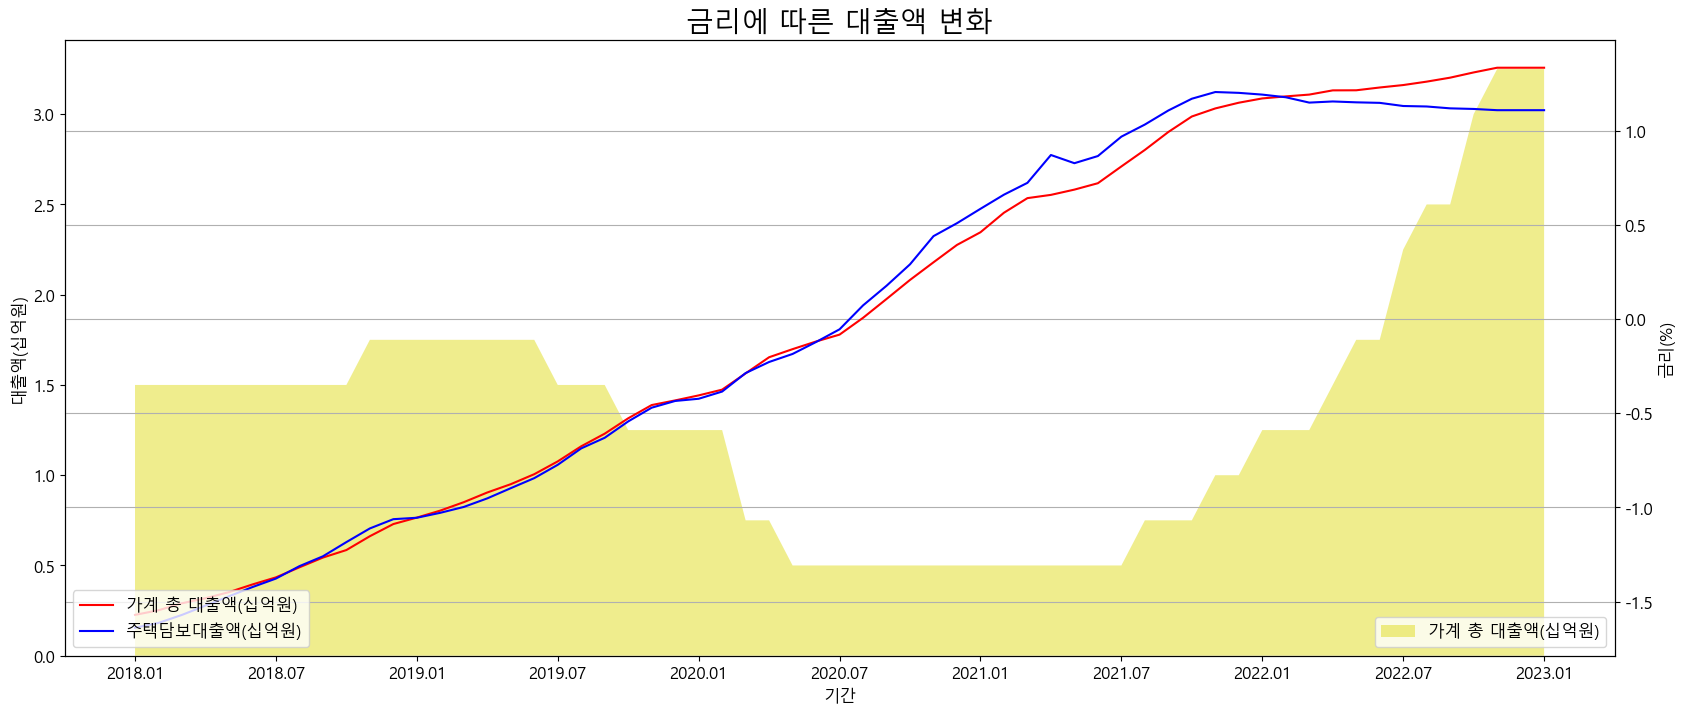

In [15]:
font()
fig, ax1 = plt.subplots(figsize = (20, 8))SS
color = ['#E0DC1D', '#1694E0']
label = ['가계 총 대출액(십억원)', '주택담보대출액(십억원)']
ax1.stackplot(log_df.year, log_df.rate, colors = color, labels = label, alpha = 0.5) 
ax2 = ax1.twinx()
ax2.plot(log_df.year, log_df.mortgage_loan, color = 'r', label = label[0]) 
ax2.plot(log_df.year, log_df.industry_loan, color = 'b', label = label[1]) 

ax1.legend(loc = 4)
ax2.legend(loc = 3)
plt.title('금리에 따른 대출액 변화', fontsize = 20)
ax1.set_xlabel('기간')
ax1.set_ylabel('대출액(십억원)')
ax2.set_ylabel('금리(%)')
plt.xticks(range(0,61,6), log_df.year[::6], rotation = 90, fontsize = 5)

plt.savefig('saving/금리에 따른 정규화 대출액 변화.png')
plt.grid(True)
plt.show()

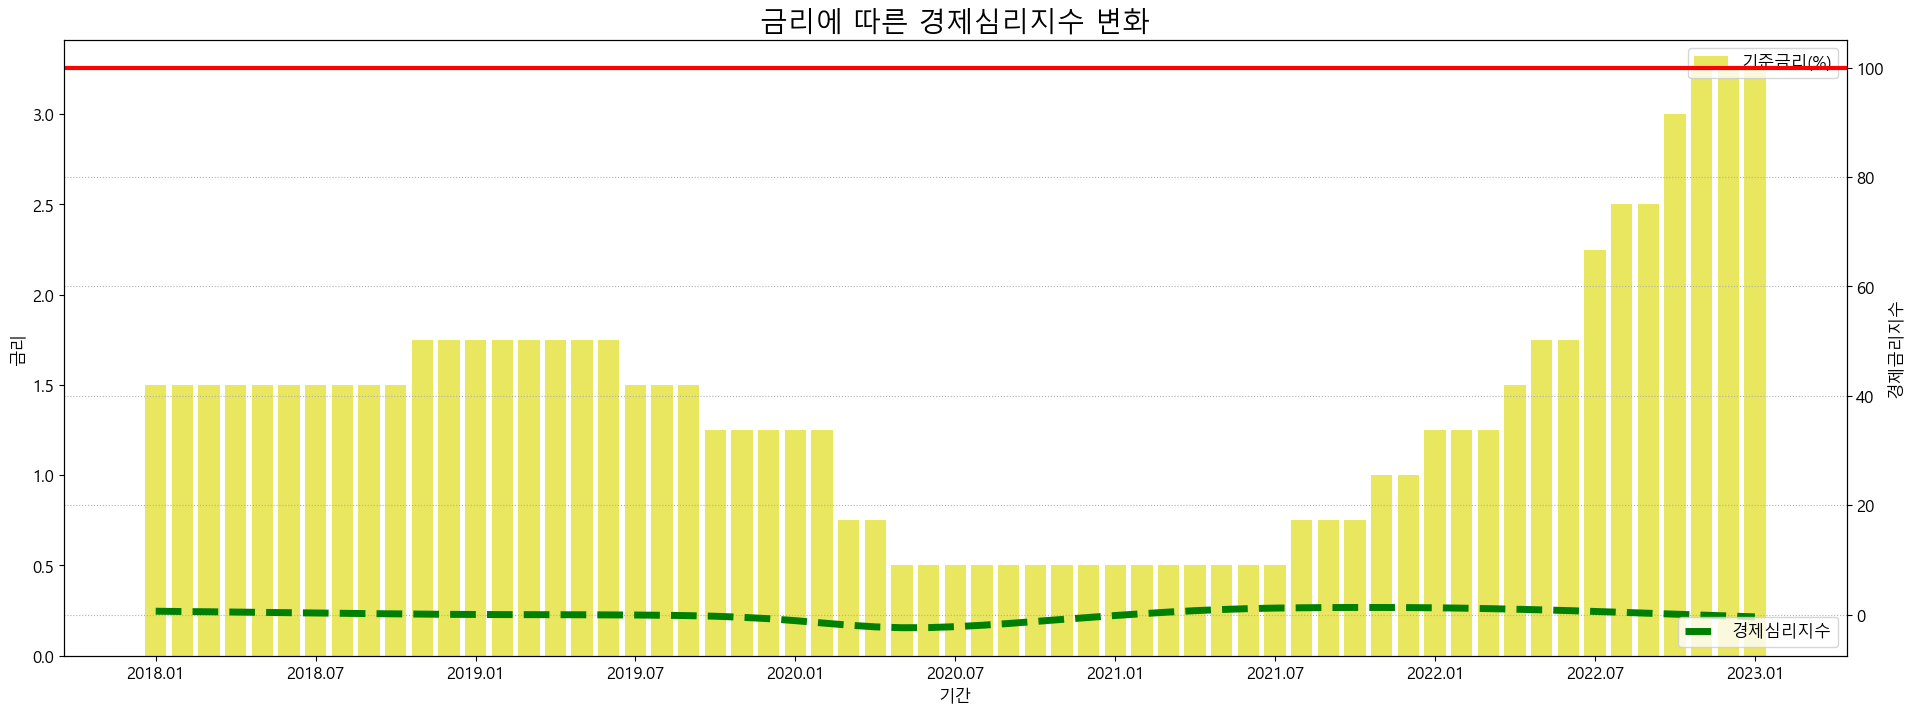

In [16]:
font()
fig, ax1 = plt.subplots(figsize = (23, 8))
ax1.bar(log_df.year, log_df.rate, color = '#E0DC1D', alpha = 0.7, label = '기준금리(%)')
ax2 = ax1.twinx()
ax2.plot(log_df.year, log_df.ESI, 'g--', label = '경제심리지수', linewidth = 5)
ax2.axhline(y = 100, color = 'red', linewidth = 3)

ax1.legend(loc = 1)
ax2.legend(loc = 4)
plt.title('금리에 따른 경제심리지수 변화', fontsize = 20)
ax1.set_xlabel('기간')
ax1.set_ylabel('금리')
ax2.set_ylabel('경제금리지수')

plt.xticks(range(0,61,6), log_df.year[::6], rotation = 90, fontsize = 5)
plt.savefig('saving/금리에 따른 경제심리지수 변화.png')


plt.grid(linestyle=':')
plt.show()

## 소비자 물가지수와 함께 경제 데이터 살펴보기

In [17]:
cpi_df = pd.read_csv('data/cpi_df.csv')
cpi_df.year = cpi_df.year.astype(str)
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   61 non-null     int64  
 1   year         61 non-null     object 
 2   총지수          61 non-null     float64
 3   생활물가지수       61 non-null     float64
 4   신선식품지수       61 non-null     float64
 5   농산물및석유류제외지수  61 non-null     float64
 6   식료품및에너지제외지수  61 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ KB


In [18]:
economy_df = pd.merge(df, cpi_df, on = 'year', how = 'inner').drop(columns = 'Unnamed: 0')
economy_df.head()

,year,rate,mortgage_loan,industry_loan,ESI,총지수,생활물가지수,신선식품지수,농산물및석유류제외지수,식료품및에너지제외지수
0,2018.01,1.5,465097.3,662924.0,100.5,0.8,0.7,-5.2,0.9,1.0
1,2018.02,1.5,466588.2,665133.2,100.0,1.3,1.3,2.6,1.1,1.2
2,2018.03,1.5,468822.8,668858.6,99.6,1.2,1.1,-1.2,1.3,1.3
3,2018.04,1.5,470447.7,673131.6,99.1,1.5,1.5,3.1,1.4,1.4
4,2018.05,1.5,472394.1,677460.0,98.6,1.5,1.5,1.9,1.3,1.4


In [19]:
economy_df = economy_df.iloc[:, :-4]


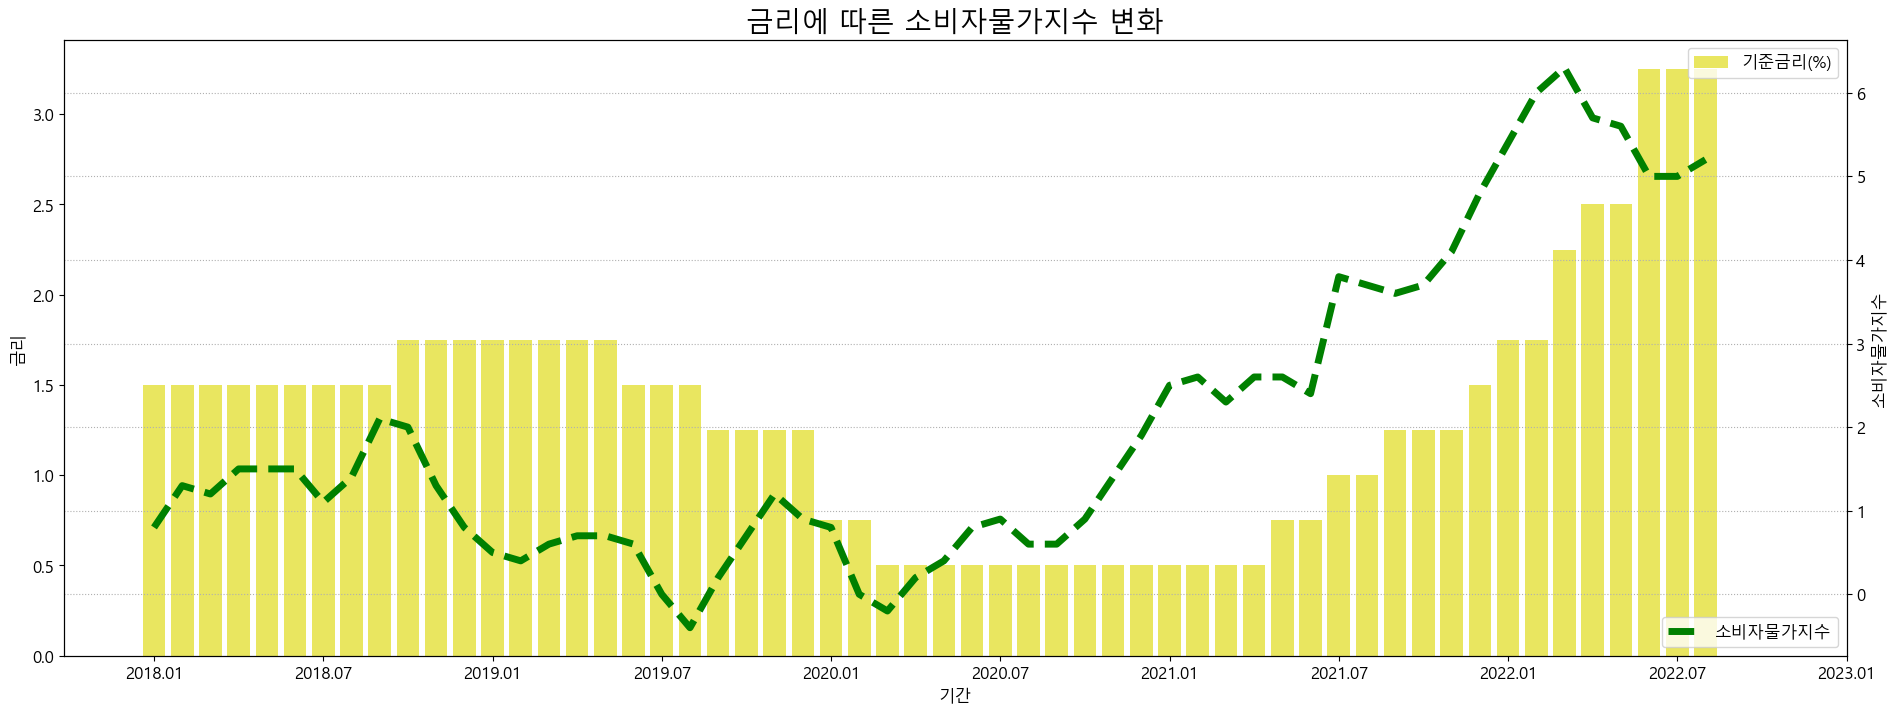

In [20]:
font()
fig, ax1 = plt.subplots(figsize = (23, 8))

x = np.arange(len(log_df))
ax1.bar(economy_df.year, economy_df.rate, color = '#E0DC1D', alpha = 0.7, label = '기준금리(%)')

ax2 = ax1.twinx()
ax2.plot(economy_df.year, economy_df.총지수, 'g--', label = '소비자물가지수', linewidth = 5)

ax1.legend(loc = 1)
ax2.legend(loc = 4)
plt.title('금리에 따른 소비자물가지수 변화', fontsize = 20)
ax1.set_xlabel('기간')
ax1.set_ylabel('금리')
ax2.set_ylabel('소비자물가지수')
plt.xticks(range(0,61,6), log_df.year[::6], rotation = 90, fontsize = 5)

plt.grid(linestyle=':')
plt.savefig('saving/금리에 따른 소비자물가지수 변화.png')
plt.show()


In [21]:
economy_df.corr()

,rate,mortgage_loan,industry_loan,ESI,총지수
rate,1.000000,0.033628,-0.047016,0.193298,0.510473
mortgage_loan,0.033628,1.000000,0.995721,0.249926,0.734848
industry_loan,-0.047016,0.995721,1.000000,0.258422,0.695048
ESI,0.193298,0.249926,0.258422,1.000000,0.527577
총지수,0.510473,0.734848,0.695048,0.527577,1.000000


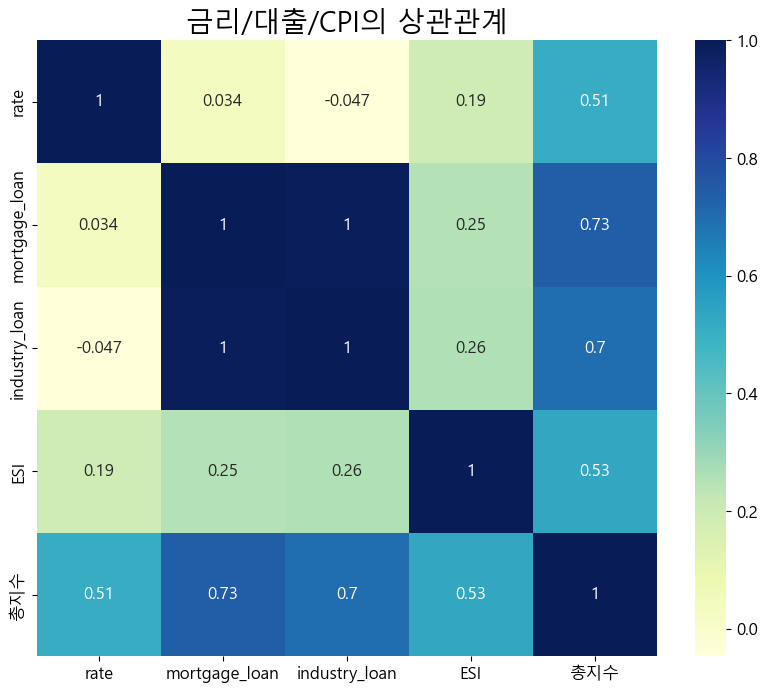

In [22]:
font()
plt.figure(figsize=(10, 8))
sns.heatmap(economy_df.corr(), cmap='YlGnBu', annot=True)
plt.title('금리/대출/CPI의 상관관계', fontsize = 20)
plt.savefig('saving/상관관계.png')
plt.show()

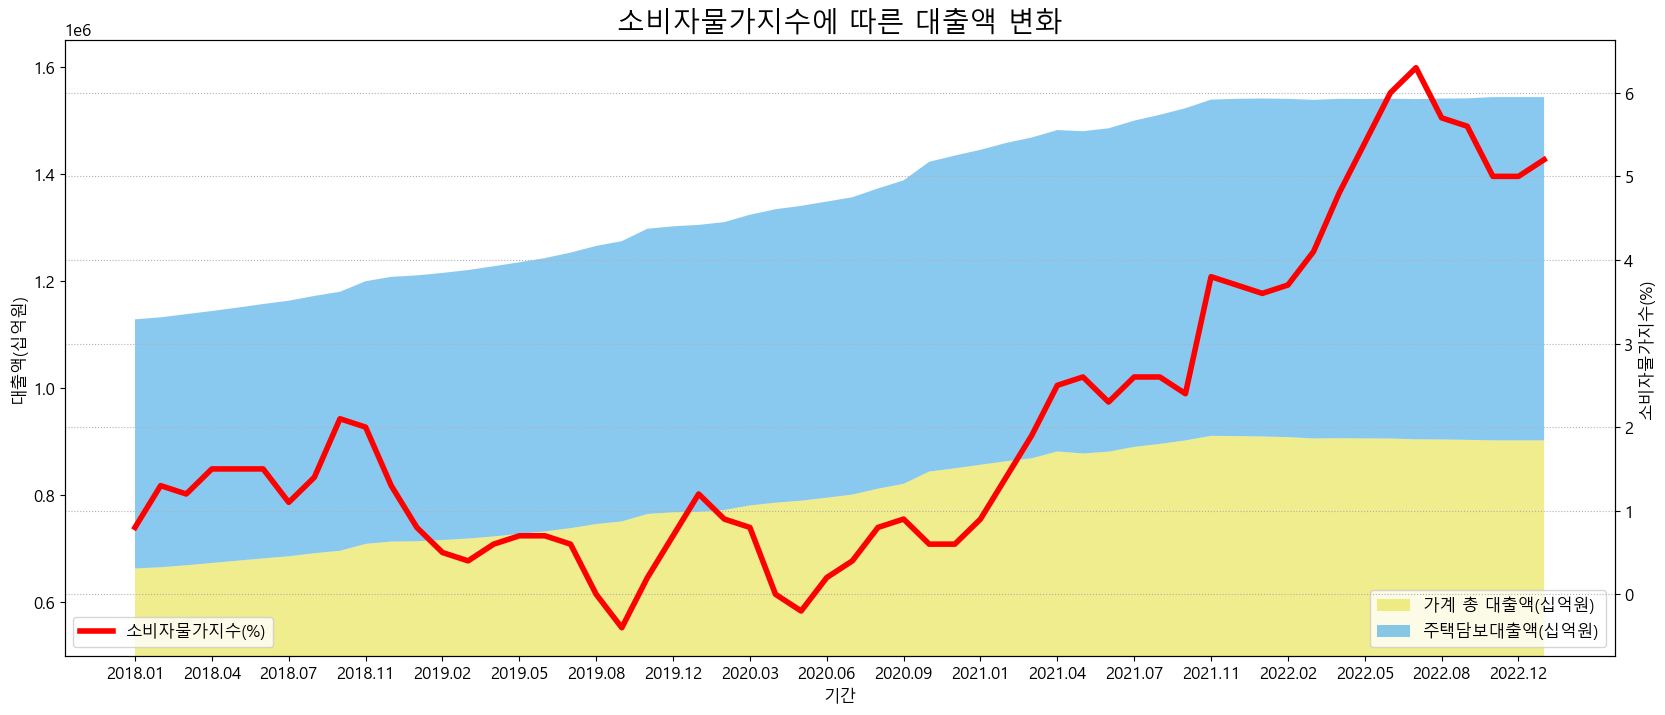

In [24]:
font()
fig, ax1 = plt.subplots(figsize = (20, 8))

color = ['#E0DC1D', '#1694E0']
label = ['가계 총 대출액(십억원)', '주택담보대출액(십억원)']

ax1.stackplot(economy_df.year, economy_df.industry_loan, economy_df.mortgage_loan, colors = color, labels = label, alpha = 0.5) 

ax2 = ax1.twinx()
ax2.plot(economy_df.year, economy_df.총지수, 'r-', label = '소비자물가지수(%)', linewidth = 4)

ax1.legend(loc = 4)
ax2.legend(loc = 3)
plt.title('소비자물가지수에 따른 대출액 변화', fontsize = 20)
ax1.set_xlabel('기간')
ax1.set_ylabel('대출액(십억원)')
ax1.set_ylim([500000, 1650000])
plt.xticks(range(0,56,3), economy_df.year[::3], rotation = 90)
ax2.set_ylabel('소비자물가지수(%)')

plt.savefig('saving/소비자물가지수에 따른 대출액 변화.png')
plt.grid(linestyle=':')
plt.show()